[View in Colaboratory](https://colab.research.google.com/github/AlanCramer/Intro-to-Machine-Learning/blob/master/My_MNIST_FCN.ipynb)

In [0]:
# https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

#from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import matplotlib.pyplot as plt


batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()






In [8]:
print(x_train.shape)

(60000, 28, 28)


In [9]:
print(x_train[0].shape)
print(x_train[0])


(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

In [10]:
print(y_train.shape)
print(y_train)
print(y_train[0])

(60000,)
[5 0 4 ... 5 6 8]
5


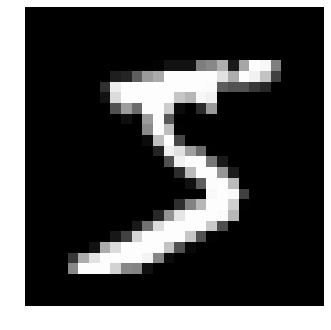

In [11]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gist_gray'))
plt.axis("off")
plt.show()

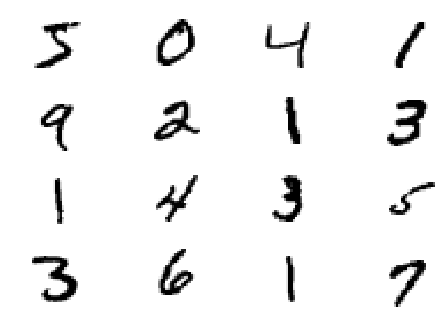

In [12]:

for i in range(0, 16):
  plt.subplot(4, 4, 1 + i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('binary'))
  plt.axis("off")
  
plt.show()


In [13]:
y_train[4]


9

In [14]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



(60000, 784)
60000 train samples
10000 test samples


In [0]:
#print(x_train[0])

In [0]:
x_train /= 255
x_test /= 255

In [0]:
#print(x_train[0])

In [18]:
print(y_train[0])
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [19]:



model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
32384/60000 [===============>..............] - ETA: 4s - loss: 0.3243 - acc:

60000/60000 [==============================] - 10s 164us/step - loss: 0.2446 - acc: 0.9241 - val_loss: 0.1129 - val_acc: 0.9642
Epoch 2/2
60000/60000 [==============================] - 9s 158us/step - loss: 0.1021 - acc: 0.9687 - val_loss: 0.0848 - val_acc: 0.9758
Test loss: 0.0847657934357645
Test accuracy: 0.9758


## Some References:

http://neuralnetworksanddeeplearning.com/

https://playground.tensorflow.org/

https://colab.research.google.com/

https://www.tensorflow.org/

https://keras.io/

https://www.kaggle.com/